# Data Science Engineering 

Topic : **Crime Analytics using NYPD Historical Complaint Data**<br>
Dataset Link : https://www.kaggle.com/datasets/supreeth888/nypd-data<br>

Algorithms Used: K-Means,KNearest Neighbour , Support Vector Machine , Linear Regression , Multinomial Naive Bayes and Gaussian Naive Bayes

# Data Extraction

**Importing all required Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pickle
import seaborn as sns
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB

**Reading the dataset using pandas**

In [2]:
df =pd.read_csv("NYPD_Complaint_Data_Historic.csv", low_memory = False)
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


# Data Preprocessing

### **Checking For NULL Values and plotting them**

In [5]:
null_ind = df.isnull().sum().index
null_val = df.isnull().sum().values

<BarContainer object of 35 artists>

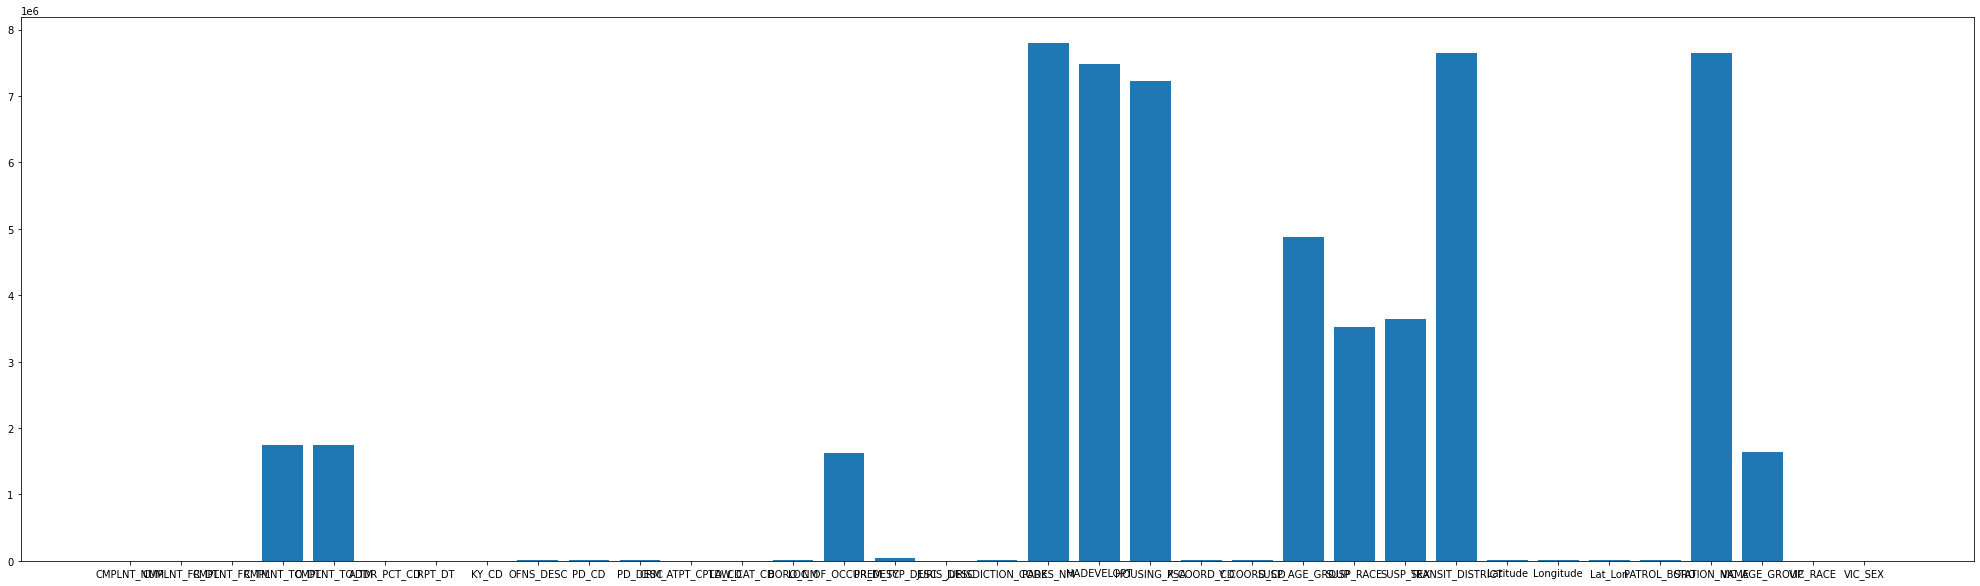

In [6]:
plt.figure(figsize = (35,10))
plt.bar(null_ind,null_val , linewidth = 0.01)

### **Droping the Unwanted and Columns with high NULL values and thus cleaning the Data**

In [7]:
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA','PD_CD','Lat_Lon','X_COORD_CD','Y_COORD_CD','JURISDICTION_CODE'], axis = 1, inplace=True)

In [8]:
df.drop(['SUSP_AGE_GROUP','SUSP_SEX','SUSP_RACE','CMPLNT_TO_DT','CMPLNT_TO_TM','VIC_AGE_GROUP','LOC_OF_OCCUR_DESC','PREM_TYP_DESC'], axis = 1, inplace = True)

# Algorithm 1 & 2 : Using **Support Vector Machine** and **Linear Regression**, we predicted the last **25 days** of the year **2019**

### Since we are predicting Time Series we will be extracting the Report Date Column and then converting it into Datetime Format|

In [9]:
df2_svm_lr = df['RPT_DT']
df2_svm_lr = pd.DataFrame(df2_svm_lr)
df2_svm_lr['RPT_DT'] = pd.to_datetime(df2_svm_lr['RPT_DT'], format='%m/%d/%Y')

### Checking for any Null Values and Dropping them

Using isna() to check for null values in the column

In [10]:
df2_svm_lr.isna().sum()

RPT_DT    0
dtype: int64

Using dropna() to drop null values in the column

In [11]:
df2_svm_lr.dropna()

,RPT_DT
0,2019-12-31
1,2019-12-29
2,2019-12-29
3,2019-12-28
4,2008-09-05
...,...
7825494,2018-12-17
7825495,2018-06-07
7825496,2018-02-10
7825497,2018-12-11


**Finding the amount of crime that was reported on each date**

In [12]:
df2_svm_lr['RPT_DT'].value_counts()

2007-05-29    1891
2006-11-01    1875
2007-10-23    1853
2007-06-05    1821
2008-07-29    1791
              ... 
2010-12-26     568
2021-02-01     518
2017-03-14     514
2012-10-29     423
2010-12-27     334
Name: RPT_DT, Length: 5844, dtype: int64

Seprating the date and the amount fo crimes to form a dataset and then extracting only the year which will be later used to sort according to the 2019 data

In [13]:
ind = df2_svm_lr['RPT_DT'].value_counts().index
num = df2_svm_lr['RPT_DT'].value_counts().values

In [14]:
df3 = pd.DataFrame(ind , columns = ['Date'])
df3['Crime'] = num
df3 = df3.sort_values('Date')
df3['Date'] = pd.to_datetime(df3['Date'], format='%m/%d/%Y')
df3['Year'] = df3['Date'].dt.year
df3

,Date,Crime,Year
3189,2006-01-01,1331,2006
3578,2006-01-02,1299,2006
2855,2006-01-03,1359,2006
416,2006-01-04,1590,2006
272,2006-01-05,1619,2006
...,...,...,...
4071,2021-12-27,1255,2021
4372,2021-12-28,1227,2021
3358,2021-12-29,1318,2021
4156,2021-12-30,1247,2021


**Forming a new Dataset with only 2019 Data**

In [15]:
yr = df3.loc[df3['Year'] == 2019]

In [16]:
yr =yr.set_index('Date')
yr = yr.drop('Year' , axis = 1)
yr.shape

(365, 1)

Plotting the Crime Rate in 2019 using a Line Graph

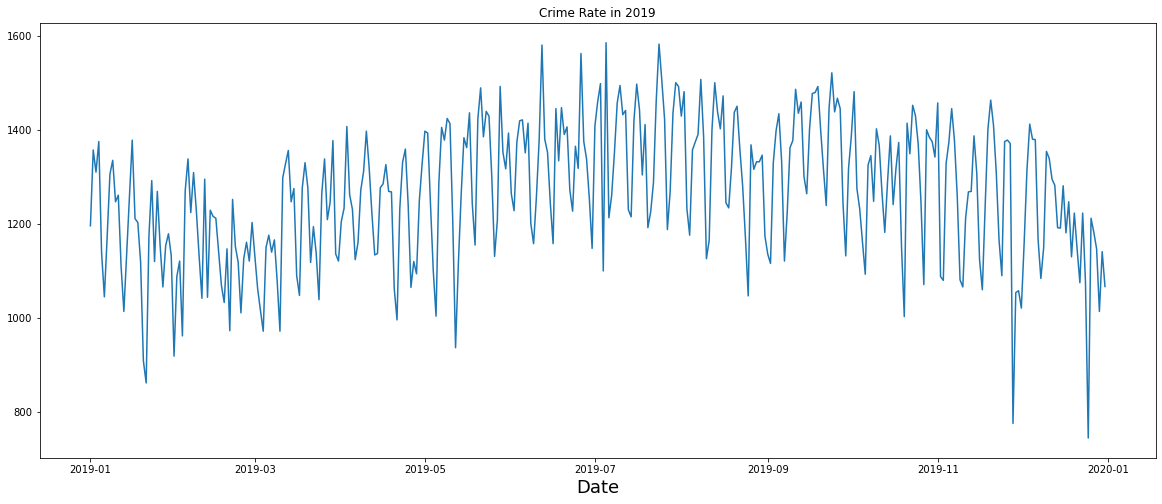

In [17]:
plt.figure(figsize=(20,8))
plt.plot(yr['Crime'])
plt.title('Crime Rate in 2019')
plt.xlabel('Date', fontsize = 18)
plt.show()

**Here we store the No of days in a variable top call it anytime and then Create a new column 'Prediction' and shift it 25 Days less so that it can be predicted**

In [18]:
days_to_predict = 25
yr['Prediction'] = yr['Crime'].shift(-days_to_predict)
yr.tail(4)

,Crime,Prediction
Date,,
2019-12-28,1147,NaN
2019-12-29,1014,NaN
2019-12-30,1141,NaN
2019-12-31,1067,NaN


Storing Values of X and y

In [19]:
X = np.array(yr.drop(['Prediction'], axis = 1))[:-days_to_predict]

In [20]:
y = np.array(yr['Prediction'])[:-days_to_predict]

Using the sklearn Module we retrieve  train test split, SVM and Linear Regression . WE split the data into 70%-30% format

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [22]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [23]:
lr = LinearRegression().fit(X_train, y_train)

Taking the last 25 days crime rate to be predicted

In [24]:
pred= yr.drop(['Prediction'], axis = 1)[:-days_to_predict]
pred = pred.tail(days_to_predict)
pred = np.array(pred)
pred

array([[1268],
       [1269],
       [1387],
       [1308],
       [1124],
       [1060],
       [1235],
       [1401],
       [1463],
       [1410],
       [1309],
       [1165],
       [1090],
       [1375],
       [1378],
       [1371],
       [ 776],
       [1054],
       [1058],
       [1021],
       [1159],
       [1313],
       [1412],
       [1380],
       [1379]])

**Predicting the SVM and Linear Regresion Models**

In [25]:
svm_pred = svr.predict(pred)
svm_pred

array([1161.76663013, 1114.1001149 , 1243.89987804, 1353.8998093 ,
       1396.90029466, 1294.89980679, 1475.66631299, 1352.32939802,
       1191.09998737, 1280.89961533, 1249.80353328, 1247.10004315,
       1228.91362447, 1286.89999171, 1126.46164343, 1231.03891133,
       1223.10007736, 1110.43546887,  745.10011902, 1212.09997996,
       1404.78979802, 1147.10005084, 1419.20324512, 1152.18048611,
       1130.88945871])

In [31]:
lr_pred = lr.predict(pred)
lr_pred

array([1273.20392033, 1273.15002494, 1266.79036924, 1271.04810484,
       1280.96485611, 1284.4141609 , 1274.98246811, 1266.03583382,
       1262.6943198 , 1265.55077533, 1270.99420945, 1278.75514523,
       1282.79729928, 1267.43711389, 1267.27542773, 1267.65269544,
       1299.7204509 , 1284.73753322, 1284.52195167, 1286.516081  ,
       1279.07851755, 1270.7786279 , 1265.44298456, 1267.16763695,
       1267.22153234])

**Plottin the Prediction of SVM**

Text(0.5, 1.0, 'SVM')

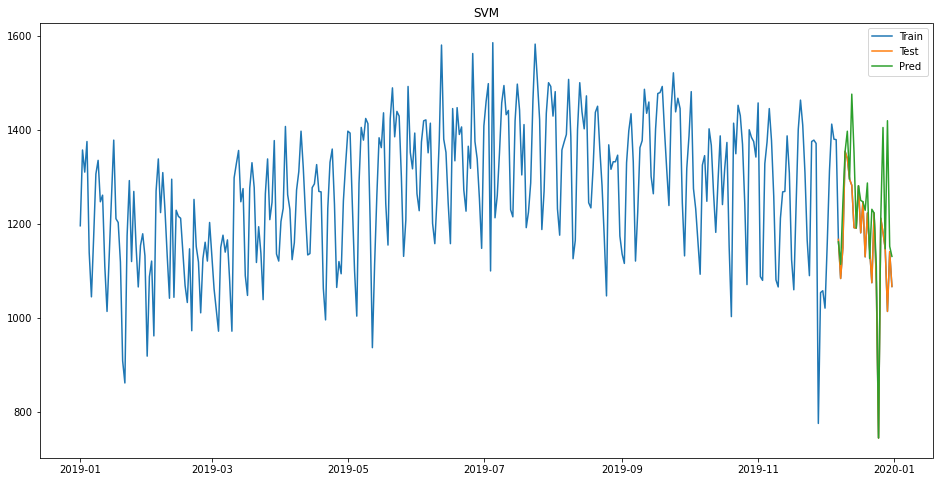

In [32]:
predictions = svm_pred
svm_pred_ks = yr[X.shape[0]:]
svm_pred_ks['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.plot(yr['Crime'])
plt.plot(svm_pred_ks[['Crime' , 'Predictions']])
plt.legend(['Train' , 'Test' , 'Pred'])
plt.title('SVM')

**Plotting the Classic Linear Regression Plot and then Plotting it with the Data**

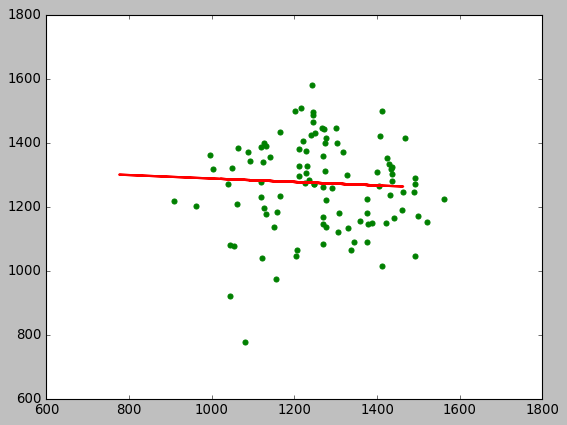

In [35]:
plt.style.use('classic')
plt.scatter(X_test, y_test,  color='green')
plt.plot(pred, lr_pred, color='red', linewidth=2)
plt.show()


Text(0.5, 1.0, 'Linear Regression')

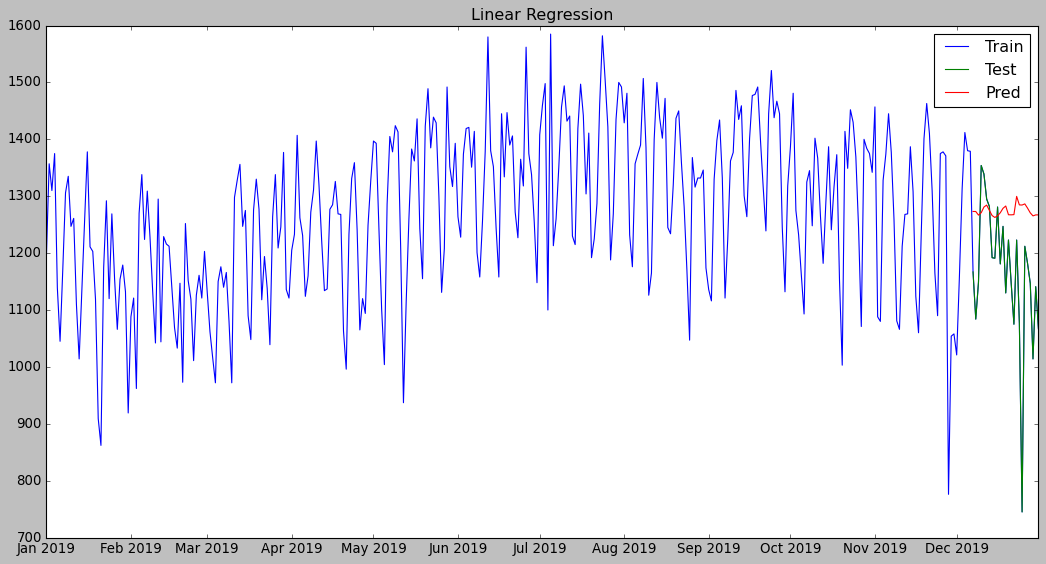

In [36]:
predictions = lr_pred
lr_pred_ks = yr[X.shape[0]:]
lr_pred_ks['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.plot(yr['Crime'])
plt.plot(lr_pred_ks[['Crime' , 'Predictions']])
plt.legend(['Train' , 'Test' , 'Pred'])
plt.title('Linear Regression')

**Storing the data of the Crime column for the days required**

In [37]:
X_val = yr['Crime'].values[-days_to_predict:]

**R2 Score for SVM and Linear Regression**

In [38]:
print('R2 Score is:',r2_score(X_val, svm_pred))

R2 Score is: 0.06231717953572624


In [40]:
print('R2 Score is',r2_score(X_val, lr_pred))

R2 Score is -0.8195402169984916


Root Mean Square Error of SVM and Linear Regression

In [43]:
from math import sqrt
mse = mean_squared_error(X_val, svm_pred)
rmse = sqrt(mse)
rmse

116.45168093862466

In [45]:
from math import sqrt
mse = mean_squared_error(X_val, lr_pred)
rmse = sqrt(mse)
rmse

162.21783905564845

# Algorithm 3 & 4 : Using **K-Nearest Neighbour** and **Decision Tree**, we classified which type of crime complaint was under what Jurisdiction

# Data Extraction

In [46]:
df3_knn = df

In [47]:
df3_knn

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,JURIS_DESC,Latitude,Longitude,PATROL_BORO,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,32.0,12/31/2019,118,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,N.Y. POLICE DEPT,40.820927,-73.943324,PATROL BORO MAN NORTH,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,47.0,12/29/2019,113,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,N.Y. POLICE DEPT,40.885701,-73.861640,PATROL BORO BRONX,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,109.0,12/29/2019,578,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,N.Y. POLICE DEPT,40.742281,-73.819824,PATROL BORO QUEENS NORTH,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1,COMPLETED,FELONY,BRONX,N.Y. POLICE DEPT,40.875311,-73.847545,PATROL BORO BRONX,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,COMPLETED,FELONY,NaN,N.Y. POLICE DEPT,40.698827,-73.938819,NaN,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,LEAVING SCENE-ACCIDENT-PERSONA,COMPLETED,MISDEMEANOR,BRONX,N.Y. HOUSING POLICE,40.887333,-73.847250,PATROL BORO BRONX,WHITE HISPANIC,F
7825495,380927470,06/05/2018,23:30:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,"LARCENY, GRAND OF MOPED",COMPLETED,FELONY,BRONX,N.Y. POLICE DEPT,40.827414,-73.877946,PATROL BORO BRONX,BLACK,M
7825496,502083804,02/10/2018,08:30:00,42.0,02/10/2018,341,PETIT LARCENY,"LARCENY,PETIT FROM OPEN AREAS,",COMPLETED,MISDEMEANOR,BRONX,N.Y. POLICE DEPT,40.834528,-73.903836,PATROL BORO BRONX,BLACK,F
7825497,609916130,12/11/2018,07:30:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,N.Y. POLICE DEPT,40.811812,-73.938329,PATROL BORO MAN NORTH,BLACK,M


### Checking for Null Values

In [48]:
print(df3_knn.shape)
df3_knn.isnull().sum().sort_values(ascending=True)

(7825499, 17)


CMPLNT_NUM              0
JURIS_DESC              0
LAW_CAT_CD              0
RPT_DT                  0
KY_CD                   0
CMPLNT_FR_TM           48
CRM_ATPT_CPTD_CD      168
VIC_SEX               308
VIC_RACE              390
CMPLNT_FR_DT          655
ADDR_PCT_CD          2166
PD_DESC              6761
PATROL_BORO          7218
BORO_NM             12480
Latitude            17339
Longitude           17339
OFNS_DESC           18832
dtype: int64

Since there was no NaN values in the required column we directly use the KY_CD and JURIS_DESC and convert it into a seperate DataFrame

In [49]:
col = ['KY_CD','JURIS_DESC']
der_df = pd.DataFrame(df3_knn[col])
der_df

,KY_CD,JURIS_DESC
0,118,N.Y. POLICE DEPT
1,113,N.Y. POLICE DEPT
2,578,N.Y. POLICE DEPT
3,126,N.Y. POLICE DEPT
4,101,N.Y. POLICE DEPT
...,...,...
7825494,348,N.Y. HOUSING POLICE
7825495,110,N.Y. POLICE DEPT
7825496,341,N.Y. POLICE DEPT
7825497,344,N.Y. POLICE DEPT


Using Label Encoder on the column JURIS_DESC

In [50]:
lec = preprocessing.LabelEncoder()
e = lec.fit_transform(df['JURIS_DESC'])
der_df['JURIS_DESC'] = e
der_df

,KY_CD,JURIS_DESC
0,118,9
1,113,9
2,578,9
3,126,9
4,101,9
...,...,...
7825494,348,8
7825495,110,9
7825496,341,9
7825497,344,9


Since the data is too large and was taking a long time for execution we shortened the data using iloc. We als assigned the values of X and y

In [51]:
der_df = der_df.iloc[:1000000]
X = der_df['KY_CD']
y = der_df['JURIS_DESC']

In [52]:
der_df.JURIS_DESC.value_counts()

9     894024
8      71945
12     23193
18      3852
20      3744
2       1242
5        494
15       488
23       394
11       232
7         93
19        57
13        46
6         45
24        42
10        39
22        35
17        14
0         14
4          5
1          2
Name: JURIS_DESC, dtype: int64

Pie Plotting the unique values of JURIS_DESC

<AxesSubplot:ylabel='JURIS_DESC'>

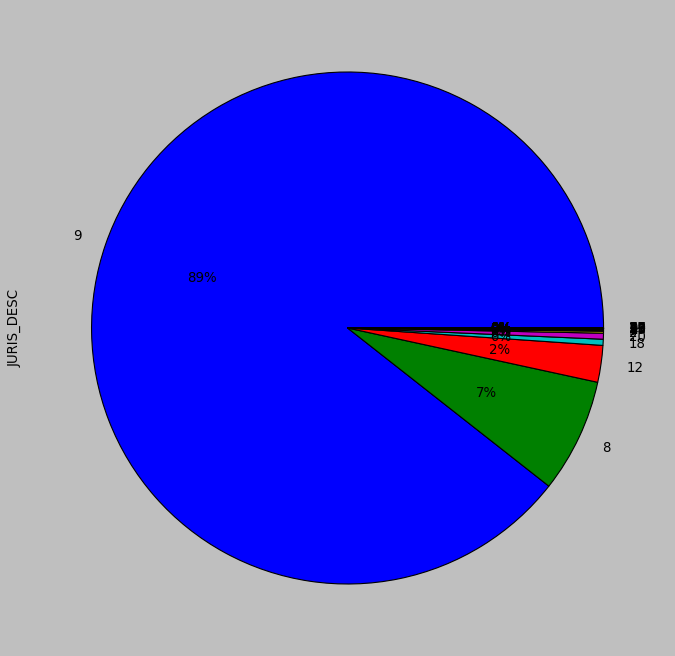

In [53]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
der_df.JURIS_DESC.value_counts().plot(kind='pie', autopct='%1.0f%%' )

Splitting the data into 80%-20%

In [54]:
X_train,X_test, y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

Converting X_train and X_test into 2D array

In [55]:
X_train = np.array(X_train.values.tolist())
X_train = X_train.reshape(-1, 1)
X_test = np.array(X_test.values.tolist())
X_test = X_test.reshape(-1, 1)

Scaling X_train and X_test using Standard Scaler 

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initializing the KNN and Decision Tree Models using the sklearn Modules

In [57]:
knn_model = KNeighborsRegressor(n_neighbors=3)
tree_pred = DecisionTreeRegressor()

using .fit() on both models

In [58]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
tree_pred.fit(X_train, y_train)

DecisionTreeRegressor()

**Predicting the Models using X_test**

In [60]:
train_preds = knn_model.predict(X_test)

In [61]:
train_tree = tree_pred.predict(X_test)

**Finding the RMSE value of KNN**

In [62]:
from math import sqrt
mse = mean_squared_error(y_test, train_preds)
rmse_knn = sqrt(mse)
rmse_knn

1.171078562693383

**Finding the RMSE value of Decision Tree**

In [86]:
from math import sqrt
mse = mean_squared_error(y_test, train_tree)
rmse = sqrt(mse)
rmse

1.1058610705664855

# Algorithm 5,6 &7 : Using **K-Means**,**Gaussian Naive Bayes**, **Multinomial Naive Bayes** we classified Crime  using the Crime Description

# Data Extraction

In [64]:
df_kmeans = df

Since the result with the full dataset were very inaccurate we have taken a small part of the dataset

In [65]:
df_kmeans = df_kmeans.iloc[:500000]

All the unique values ins LAW_CAT_CD column

In [66]:
df_kmeans.LAW_CAT_CD.unique()

array(['FELONY', 'VIOLATION', 'MISDEMEANOR'], dtype=object)

In [67]:
df_kmeans.PD_DESC.unique().shape

(357,)

**Using Label Encoder we create a new column and add the encoded values of LAW_CAT_CD**

In [68]:
lec = preprocessing.LabelEncoder()
e = lec.fit_transform(df_kmeans['LAW_CAT_CD'])
df_kmeans['encoded'] = e
df_kmeans

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,JURIS_DESC,Latitude,Longitude,PATROL_BORO,VIC_RACE,VIC_SEX,encoded
0,394506329,12/31/2019,17:30:00,32.0,12/31/2019,118,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,N.Y. POLICE DEPT,40.820927,-73.943324,PATROL BORO MAN NORTH,UNKNOWN,E,0
1,968873685,12/29/2019,16:31:00,47.0,12/29/2019,113,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,N.Y. POLICE DEPT,40.885701,-73.861640,PATROL BORO BRONX,UNKNOWN,E,0
2,509837549,12/15/2019,18:45:00,109.0,12/29/2019,578,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,N.Y. POLICE DEPT,40.742281,-73.819824,PATROL BORO QUEENS NORTH,WHITE HISPANIC,F,2
3,352454313,12/28/2019,01:00:00,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1,COMPLETED,FELONY,BRONX,N.Y. POLICE DEPT,40.875311,-73.847545,PATROL BORO BRONX,UNKNOWN,E,0
4,248803469,09/05/2008,21:41:00,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,COMPLETED,FELONY,NaN,N.Y. POLICE DEPT,40.698827,-73.938819,NaN,BLACK,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,338054119,11/21/2021,09:00:00,115.0,12/01/2021,109,GRAND LARCENY,"LARCENY,GRAND BY BANK ACCT COMPROMISE-ATM TRAN...",COMPLETED,FELONY,QUEENS,N.Y. POLICE DEPT,40.749707,-73.884776,PATROL BORO QUEENS NORTH,WHITE HISPANIC,F,0
499996,918918310,05/15/2021,23:15:00,44.0,11/20/2021,578,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,N.Y. POLICE DEPT,40.833639,-73.910815,PATROL BORO BRONX,BLACK,M,2
499997,192170693,11/21/2021,15:21:00,50.0,11/21/2021,578,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,N.Y. POLICE DEPT,40.869762,-73.900976,PATROL BORO BRONX,WHITE,M,2
499998,248472408,11/26/2021,21:00:00,71.0,11/27/2021,344,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,N.Y. POLICE DEPT,40.656447,-73.947266,PATROL BORO BKLYN SOUTH,BLACK,M,1


**Creating a new Dataset containg only the required columns**

In [69]:
col = ['PD_DESC','LAW_CAT_CD','encoded']
df_kmeans = pd.DataFrame(df_kmeans[col])

**Creating a function for removing Stopwords,Space and any numerical Value**

In [70]:
stemmer = PorterStemmer()
STOPWORD = set(stopwords.words('english'))
INVALID_SIGNS = re.compile('[^0-9a-z #+_]')
SPACE_REPLACE = re.compile('[/(){}\[\]\|@,;]')
NO_REMOVE = re.compile('[\d+]')

def stem_text(text):
    # standardize text
    text = text.lower() 

    # replace symbols with text
    text = SPACE_REPLACE.sub(' ', text) 
    
    # Remove any XXXXX values
    text = text.replace('x', '') 
    
    # Remove whitespaces
    text = NO_REMOVE.sub('', text)

    #  Deleting symbols
    text = INVALID_SIGNS.sub('', text) 

    # Remove StopWords
    text = ' '.join(word for word in text.split() if word not in STOPWORD) 
    
    # Words of length less than 2 or more than 21 are removed
    text = ' '.join(word for word in text.split() if (len(word) >= 2 and len(word) <= 21))

    # Word Stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    
    return text

**Applying the dunction on the subset**

In [71]:
df_kmeans['PD_DESC'] = df_kmeans['PD_DESC'].astype(str)
df_kmeans['PD_DESC'] = df_kmeans['PD_DESC'].apply(stem_text)
df_kmeans['PD_DESC']

0                                         weapon possess
1                           forgeri etc unclassifiedfelo
2                                            harass subd
3                                      reckless endanger
4                                                    nan
                               ...                      
499995    larceni grand bank acct compromiseatm transact
499996                                       harass subd
499997                                       harass subd
499998                                           assault
499999                              harass subd civilian
Name: PD_DESC, Length: 500000, dtype: object

**Since we are having textual data, we convert it to into a TFIDF Matrix using TFIDFVectorizer Function**

In [72]:
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_train_vc = vectorizer.fit_transform(df_kmeans["PD_DESC"])

pd.DataFrame(X_train_vc.toarray(), columns=vectorizer.get_feature_names_out()).head()

,abandon,abandon anim,abus,acc,accessori,accost,accost fraudul,acct,acct compromiseatm,acct compromiseeist,...,violatio,vulner,vulner elderli,weapon,weapon possess,welfar,welfar vulner,worker,worker sleep,ye
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.594919,0.594969,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


**Using the elbow method to determine the number of clusters i.e the values of k**

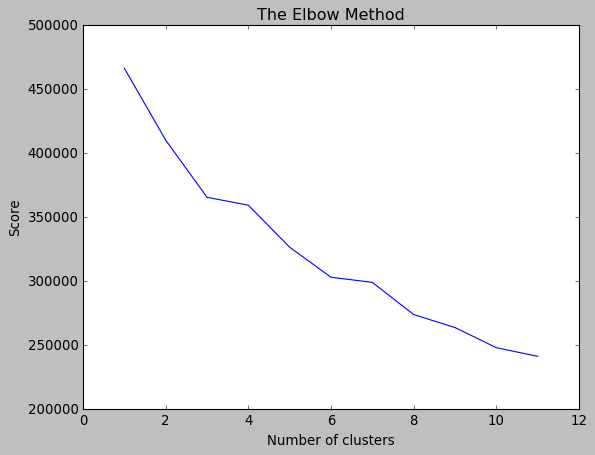

In [73]:
score = []
for i in range(1,11 + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=43)
    kmeans.fit(X_train_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,11 + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

**Creating the model of Kmeans and fitting the trained vectorized TFIDF matrix to it**

In [74]:
k_clusters = 3

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
var = model.fit(X_train_vc)

**Predicting the model**

In [75]:
category = model.predict(X_train_vc)

**Create a new column to display the predicted result**

In [76]:
df_kmeans["Categorized"] = category
df_kmeans.head(20)

,PD_DESC,LAW_CAT_CD,encoded,Categorized
0,weapon possess,FELONY,0,0
1,forgeri etc unclassifiedfelo,FELONY,0,0
2,harass subd,VIOLATION,2,1
3,reckless endanger,FELONY,0,0
4,nan,FELONY,0,0
5,burglari resid night,FELONY,0,0
6,control substanc sale,FELONY,0,0
7,larceni petit auto,MISDEMEANOR,1,0
8,aggrav harass,MISDEMEANOR,1,1
9,larceni petit auto,MISDEMEANOR,1,0


**K-Means accuracy**

In [77]:
acc = len(df_kmeans.loc[(df_kmeans['encoded'] == df_kmeans['Categorized'])])
print('%d were correctly labelled out of %d' %(acc,len(df_kmeans)))
accuracy_K = accuracy_score(df_kmeans['Categorized'],df_kmeans['encoded'])
print(accuracy_K)

159158 were correctly labelled out of 500000
0.318316


**Using PCA for plotting the clusters**

In [78]:
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X_train_vc.toarray())

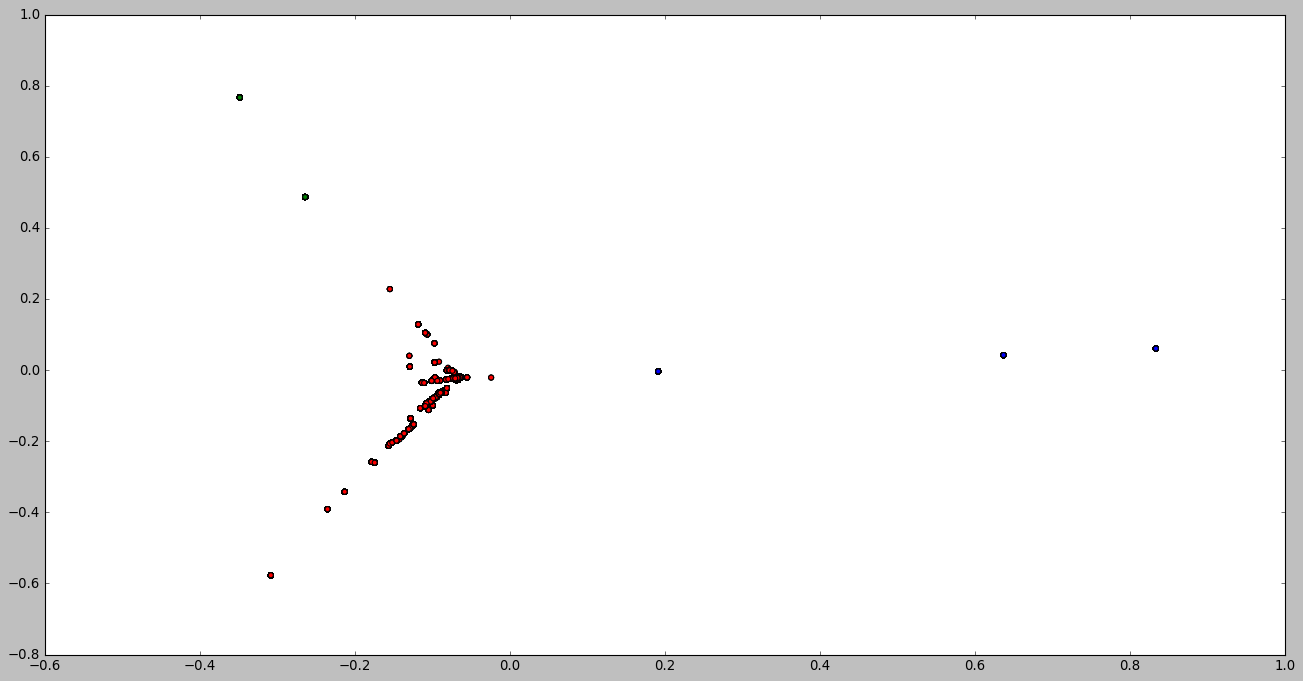

In [79]:
colors = ["r", "b", "g"]

x_axis = [z[0] for z in scatter_plot_points]
y_axis = [z[1] for z in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in category])

**Splitting the data into 80%-20%**

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(df_kmeans['encoded'],df_kmeans['PD_DESC'],test_size=0.2,random_state=42)

**Finding the shape and  vectorizing the the texts from Y i.e PD_DESC**

In [81]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400000,)
(100000,)
(400000,)
(100000,)


In [82]:
Y_train= Y_train.astype(str)
Y_train = vectorizer.transform(Y_train)
Y_train = Y_train.toarray()
Y_test= Y_test.astype(str)
Y_test = vectorizer.transform(Y_test)
Y_test = Y_test.toarray()

**Using Gaussian Naive Bayes on the data and thus finding its accuracy**

In [83]:
gnb = GaussianNB()
gnb.fit(Y_train,X_train)
X_predict = gnb.predict(Y_test)
accuracy_NB = accuracy_score(X_test,X_predict)
print(accuracy_NB)

0.96202


**Using Multinomial Naive Bayes on the data and thus finding its accuracy**

In [84]:
mnb = MultinomialNB()
mnb.fit(Y_train,X_train)
X_predict = mnb.predict(Y_test)
accuracy_MNB = accuracy_score(X_test,X_predict)
print(accuracy_MNB)

0.9734


**Comparing the accuracy of all the three algorithms used for Classification of Crime**

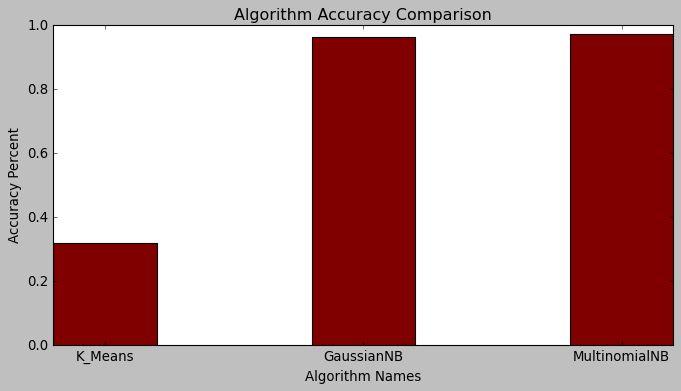

In [85]:
labels = ['K_Means','GaussianNB','MultinomialNB']
values = [accuracy_K,accuracy_NB,accuracy_MNB]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, values, color ='maroon',width = 0.4)
 
plt.xlabel("Algorithm Names")
plt.ylabel("Accuracy Percent")
plt.title("Algorithm Accuracy Comparison")
plt.show()